### Build and test a Nearest Neighbors classifier.

Load the relevant packages.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn import neighbors

Load the Iris data to use for experiments. The data include 50 observations of each of 3 types of irises (150 total). Each observation includes 4 measurements: sepal and petal width and height. The goal is to predict the iris type from these measurements.

<http://en.wikipedia.org/wiki/Iris_flower_data_set>

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris target names:', iris.target_names)
print ('Iris feature names:', iris.feature_names)
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:100], Y[:100]
test_data, test_labels = X[100:], Y[100:]

print (X.shape)

Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


Create a distance function that returns the distance between 2 observations.

# Write your own distance function

In [3]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

### k nearest neighbors

The implementation above only allows for a single nearest neighbor; that is, the classifier predicts the label of the closest available point. What about using more than one nearest neighbor. Typically, this means to make a prediciton we:

1. Find the k closest points (according to our distance metric) to the query point.
2. Find the majority label of those k points found in (1)
3. Return the label in (2) as the prediction

# Write your own KNN function

In [4]:
class OurKNearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data, k):
        results = []
        for item in test_data:
            results.append(self._predict_item(item, k))
        return results
    
    # Private function for making a single prediction using KNN.
    # pass k as a parameter to find k closest points.
    def _predict_item(self, item, k):
        dist_list = []
        label_list = []

        # run for loop to get dist and labels
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            dist_list.append(dist)
            label = self.train_labels[i]
            label_list.append(label)
        
        # merge dist_list and label_list
        dist_label = []
        dist_label.extend([list(x) for x in zip (dist_list, label_list)])

        # sort dist_label to find k closest distances
        dist_label = sorted(dist_label, key=lambda x:x[0])
        
        # get best k points and labels
        best_k_labels = [x[1] for x in dist_label]
        best_k_labels = best_k_labels[:k]

        # find the majority label of those k points found
        from collections import Counter

        label_count = Counter(best_k_labels)
        value, count = label_count.most_common()[0]

        # return the value that has the maximum count
        best_label = value

        return best_label

# Picking k: the number of neighbors to use in classification use your own KNN function

Implement a way to pick the number of neighbors to use in the classifier. We already have a test set, so simply extend the procedure in the previous code cell to run over different numbers of neighbors. Plot the test set performance versus the number of neighbors.

(note: you cannot use sklearn's implementation here; implement knn above)

total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  49  accuracy: 0.98
total:  50  correct:  47  accuracy: 0.94
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  49  accuracy: 0.98
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96
total:  50  correct:  48  accuracy: 0.96


Text(0, 0.5, 'Testing Accuracy')

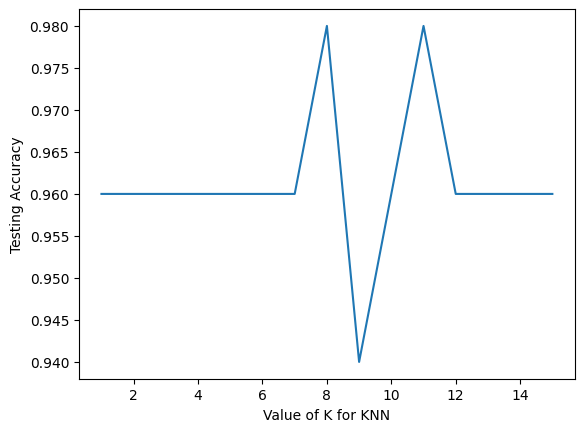

In [5]:
result = []

for k in range(1,16):

    clf = OurKNearestNeighbors()
    clf.fit(train_data, train_labels)
    preds = clf.predict(test_data, k)

    correct, total = 0, 0
    for pred, label in zip(preds, test_labels):
        if pred == label: correct += 1
        total += 1
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    result.append(1.0*correct/total)

    
##plot the result    
plt.plot(range(1,16),result)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

According to the graph above, k = 14 seems to be the ideal number in this case. 

# Visualizing the results use your own KNN function

We've been a litte haphazard so far, we should have plotted the data and some results to get an idea of how the algorithm is performing. Plot the data with the true labels as colors, and plot it with some predicted labels as colors, for differing values of k, to see how our KNN algorithm is performing.

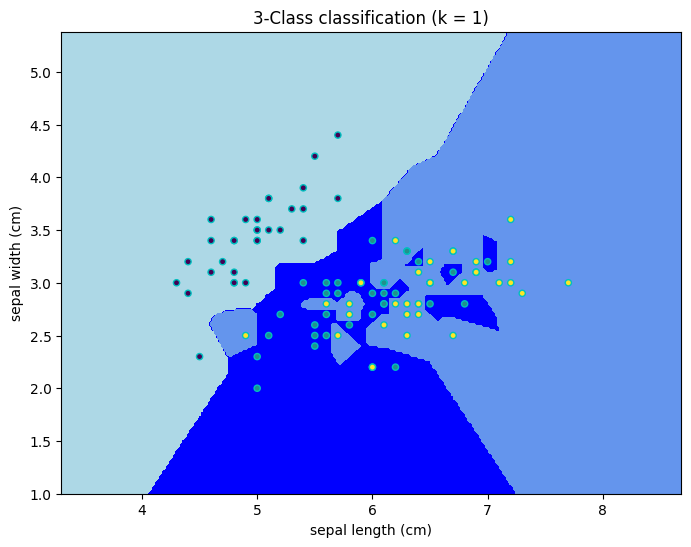

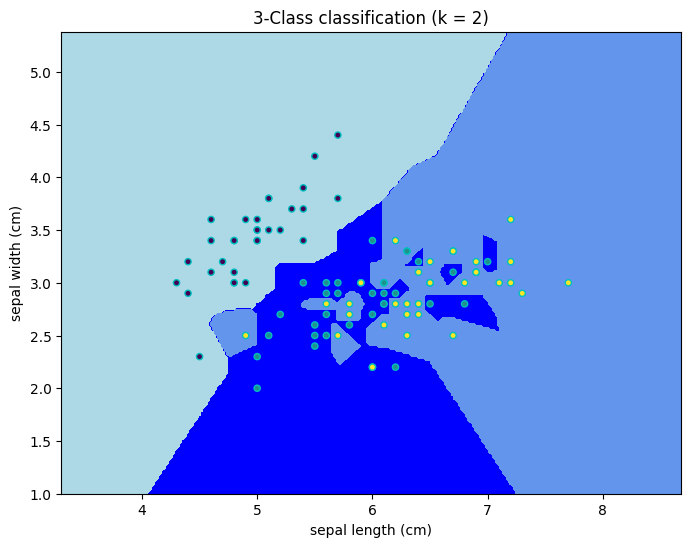

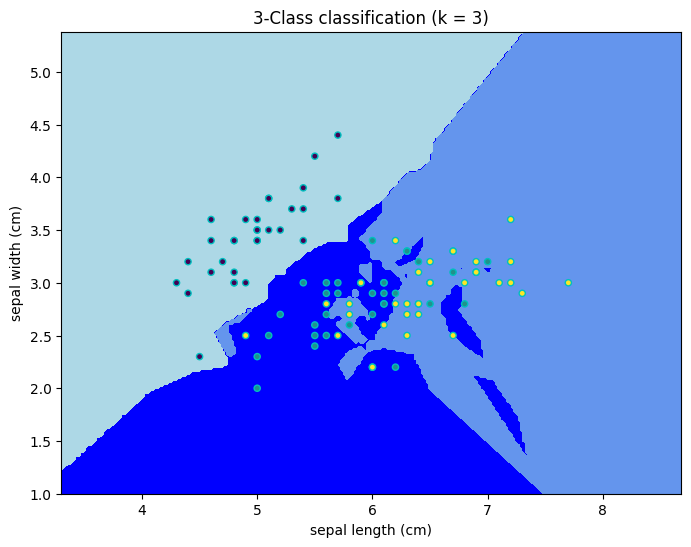

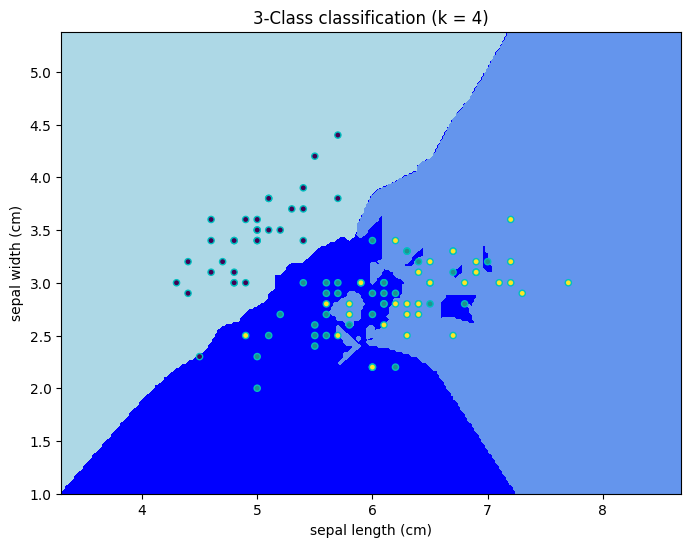

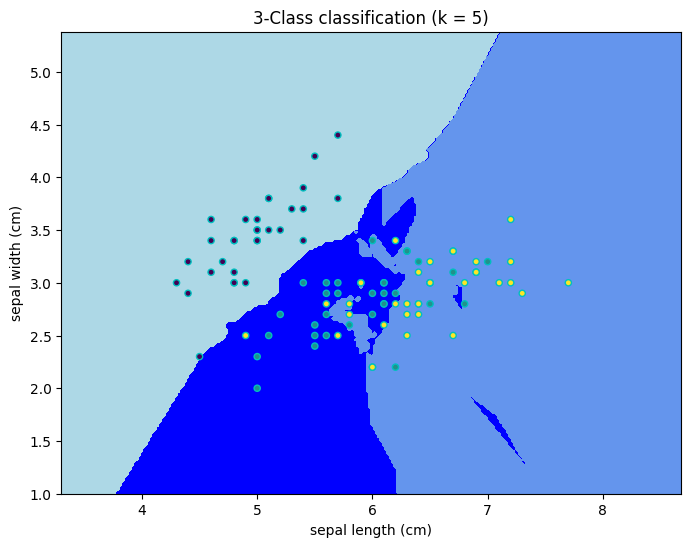

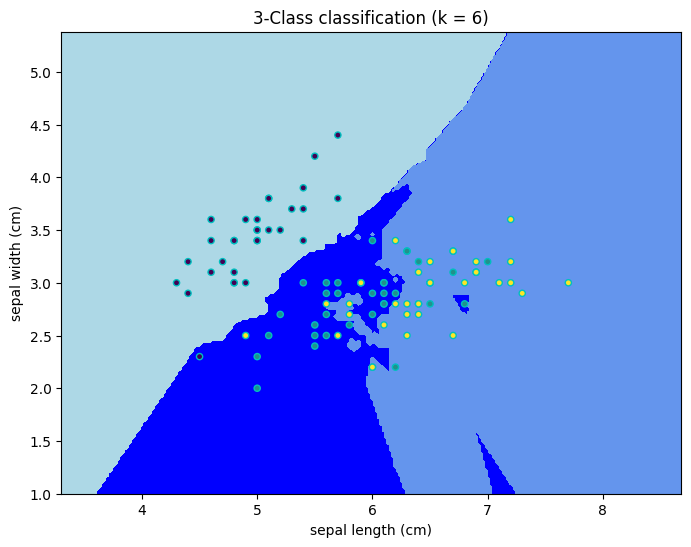

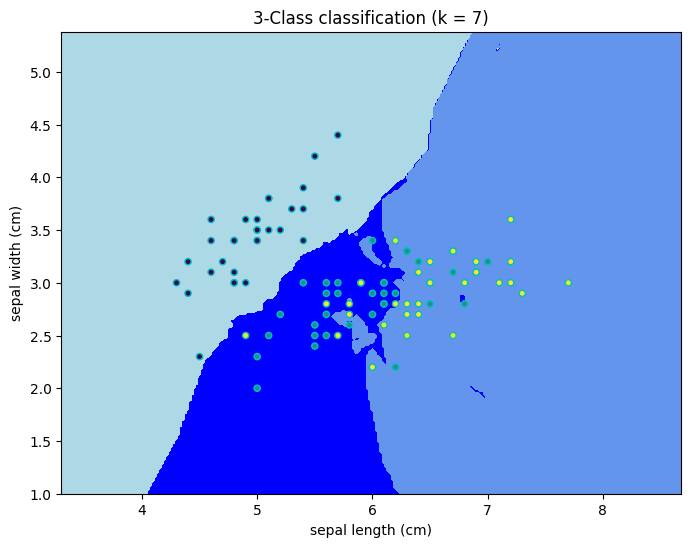

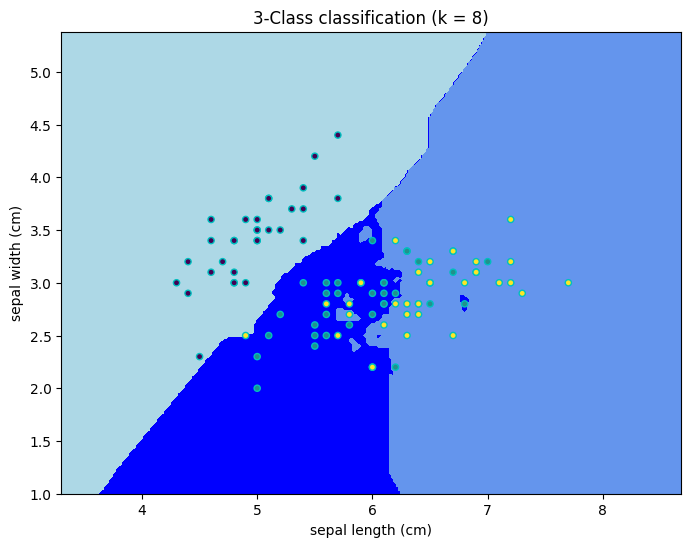

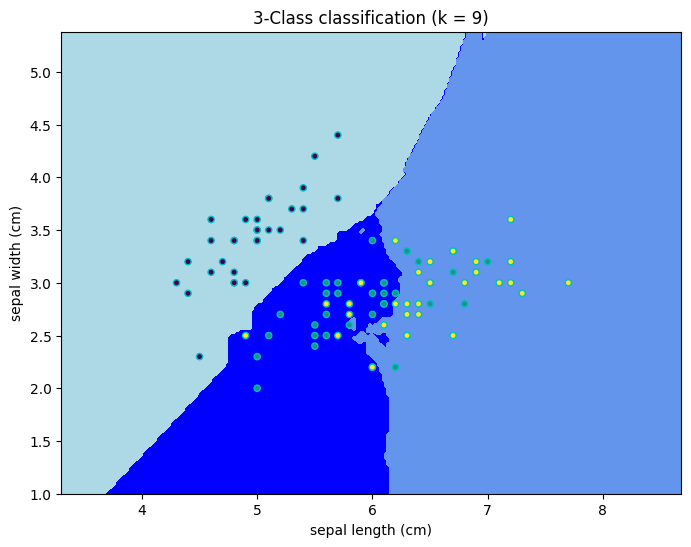

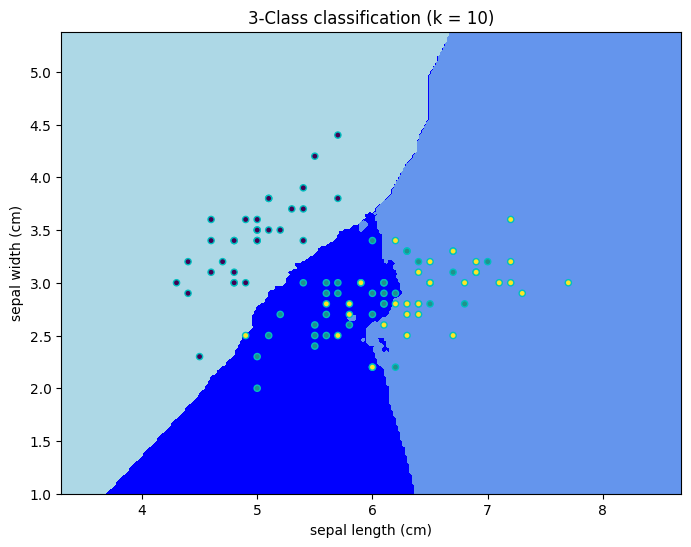

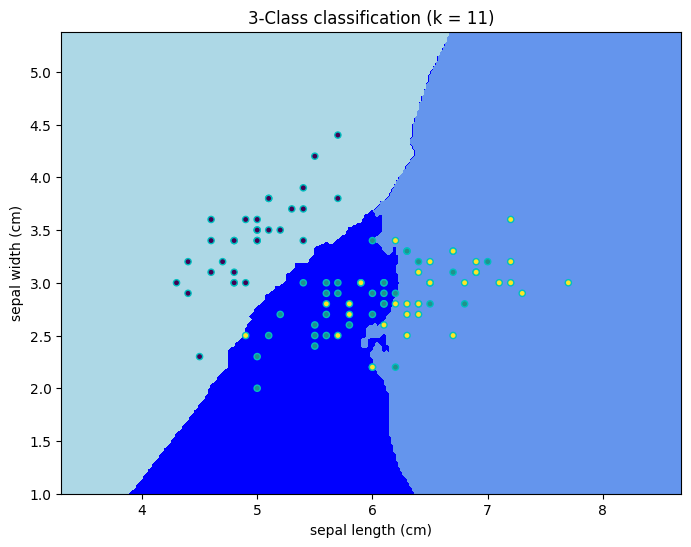

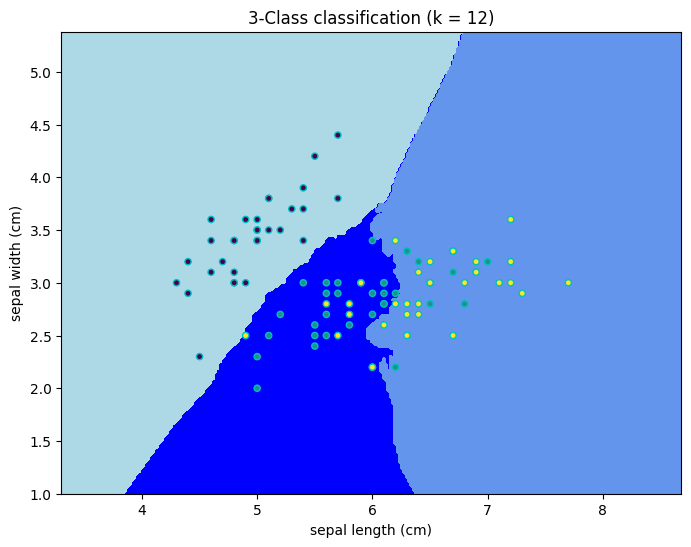

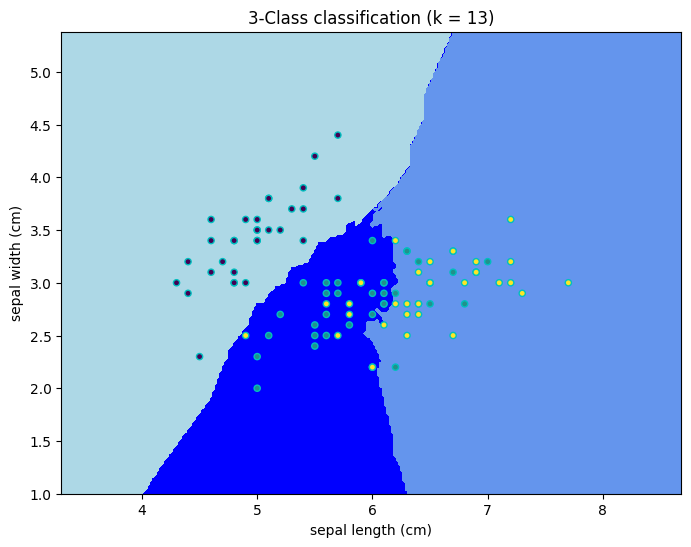

In [6]:
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["lightblue", "blue", "cornflowerblue"])
cmap_bold = ["c", "c", "c"]

for k in range(1,14):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = OurKNearestNeighbors()
    clf.fit(train_data[:, :2], train_labels)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, edgecolor="c")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i)" % (k)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

# Predict a new data point
There is a new flower, it's sepal length (cm) is 4.3, sepal width (cm) is 3.1, petal length (cm) is 1.3, petal width (cm) is 0.2. Use your KNN function and the k you selected to predict which class it should belong to.

In [13]:
# create new data that fits the descriptions above
new_data = ([[4.3, 3.1, 1.3, 0.2]])

# train the model
clf = OurKNearestNeighbors()
clf.fit(train_data, train_labels)

# put new data into the model to predict
preds = clf.predict(new_data, k=14)
print(iris.target_names[preds])

['setosa']
